## 데이터 전처리 과정에서 결측치 처리는 왜 해야 할까요??
- 데이터의 결측은 모델 학습과정에서 문제를 일으킬 수 있습니다. (결측치를 고려하여 예측을 하는 모델도 있습니다.)
- 이를 해결하기 위해 여러 방법으로 결측치 처리를 해줘야 합니다.
- 결측치 처리 방법으로 크게 제거(Deletion)와 대치(Imputation)가 있습니다.
- 소스 : https://leehah0908.tistory.com/5

In [20]:
import pandas as pd
import numpy as np
df = pd.read_csv("./data/student_data.csv")
df = df[[ 'famrel', 'freetime', 'goout','Dalc', 'Walc', 'health', 'absences']]
df.head()

,famrel,freetime,goout,Dalc,Walc,health,absences
0,4.0,3.0,4.0,1.0,1.0,3.0,6.0
1,5.0,3.0,3.0,1.0,1.0,3.0,4.0
2,4.0,3.0,2.0,2.0,3.0,3.0,10.0
3,3.0,2.0,2.0,1.0,1.0,5.0,2.0
4,4.0,3.0,2.0,1.0,2.0,5.0,4.0


In [21]:
df.isna().sum()

famrel      1
freetime    2
goout       3
Dalc        4
Walc        2
health      4
absences    3
dtype: int64

In [22]:
df[df.isna().any(axis=1)]

,famrel,freetime,goout,Dalc,Walc,health,absences
9,5.0,5.0,NaN,1.0,1.0,5.0,0.0
14,NaN,5.0,2.0,1.0,1.0,3.0,0.0
15,4.0,4.0,4.0,1.0,2.0,2.0,NaN
25,1.0,2.0,2.0,1.0,NaN,5.0,14.0
39,4.0,3.0,1.0,1.0,1.0,NaN,8.0
40,3.0,3.0,NaN,1.0,2.0,3.0,25.0
49,4.0,4.0,4.0,1.0,1.0,NaN,2.0
61,5.0,5.0,5.0,NaN,5.0,5.0,6.0
71,3.0,3.0,3.0,NaN,1.0,3.0,0.0
82,4.0,4.0,4.0,1.0,1.0,5.0,NaN


In [23]:
df.describe()

,famrel,freetime,goout,Dalc,Walc,health,absences
count,394.000000,393.000000,392.000000,391.000000,393.000000,391.000000,392.000000
mean,3.944162,3.239186,3.114796,1.470588,2.284987,3.562660,5.676020
std,0.897794,0.994265,1.112397,0.873266,1.287778,1.386949,8.013393
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


<AxesSubplot:>

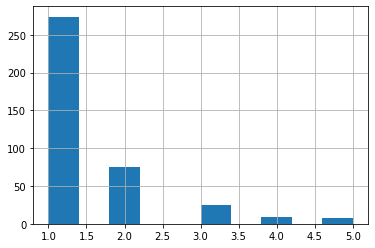

In [34]:
df['Dalc'].hist()

# 평균을 이용한 대치
- 평균은 중심에 대한 경향성을 알 수 있는 척도입니다.
- 하지만 평균은 모든 관측치의 값을 모두 반영하므로 이상치의 영향을 많이 받기 때문에 주의하여 사용해야 합니다.
- 평균을 이용하기 때문에 수치형 변수만 이 방식을 사용할 수 있습니다.

In [35]:
from sklearn.impute import SimpleImputer

# 평균으로 Imputer 선언
imputer_mean = SimpleImputer(strategy='mean')
imputer_mean.fit(df)

# 데이터 변환 (array로 반환하기 때문에 필요에 맞는 형태로 변환 후 사용)
df_tmp = imputer_mean.transform(df)
df_tmp = pd.DataFrame(df_tmp, index = df.index, columns = df.columns)

In [36]:
df_tmp.isna().sum()

famrel      0
freetime    0
goout       0
Dalc        0
Walc        0
health      0
absences    0
dtype: int64

In [37]:
df_tmp.describe()

,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,3.944162,3.239186,3.114796,1.470588,2.284987,3.562660,5.676020
std,0.896654,0.991738,1.108154,0.868822,1.284505,1.379891,7.982827
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


<AxesSubplot:>

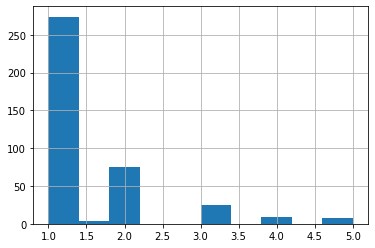

In [38]:
df_tmp['Dalc'].hist()

# 중간값을 이용한 대치
- 중간값은 데이터의 정중앙에 위치한 관측값을 말합니다.
- 데이터 샘플의 수가 짝수일 때는 중간에 위치한 두 값의 평균을 사용합니다.
- 중간값은 모든 관측치의 값을 모두 반영하지 않으므로 이상치의 영향을 덜 받습니다.
- 중간값을 이용한 이 방식 또한 수치형 변수에만 사용할 수 있습니다.

In [39]:
from sklearn.impute import SimpleImputer

# 중간값으로 Imputer 선언
imputer_mid = SimpleImputer(strategy='median')
imputer_mid.fit(df)

# 데이터 변환 (array로 반환하기 때문에 필요에 맞는 형태로 변환 후 사용)
df_tmp = imputer_mid.transform(df)
df_tmp = pd.DataFrame(df_tmp, index = df.index, columns = df.columns)

In [40]:
df_tmp.isna().sum()

famrel      0
freetime    0
goout       0
Dalc        0
Walc        0
health      0
absences    0
dtype: int64

In [41]:
df_tmp.describe()

,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,3.944304,3.237975,3.113924,1.465823,2.283544,3.567089,5.663291
std,0.896659,0.991884,1.108199,0.870102,1.284665,1.380587,7.984156
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


<AxesSubplot:>

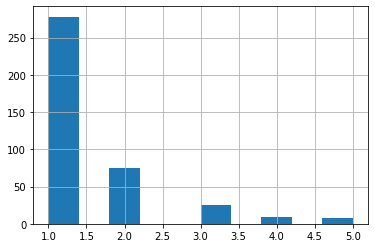

In [42]:
df_tmp['Dalc'].hist()

# 최빈값을 이용한 대치
- 최빈값은 범주 내에서 가장 자주 등장한 관측값을 말합니다.
- 최빈값을 이용한 이 방식은 빈도수를 사용하기 때문에 범주형 변수에만 사용할 수 있습니다.

In [43]:
from sklearn.impute import SimpleImputer

# 최빈값으로 Imputer 선언
imputer_mode = SimpleImputer(strategy='most_frequent')
imputer_mid.fit(df)

# 데이터 변환 (array로 반환하기 때문에 필요에 맞는 형태로 변환 후 사용)
df_tmp = imputer_mid.transform(df)
df_tmp = pd.DataFrame(df_tmp, index = df.index, columns = df.columns)

In [44]:
df_tmp.isna().sum()

famrel      0
freetime    0
goout       0
Dalc        0
Walc        0
health      0
absences    0
dtype: int64

In [45]:
df_tmp.describe()

,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,3.944304,3.237975,3.113924,1.465823,2.283544,3.567089,5.663291
std,0.896659,0.991884,1.108199,0.870102,1.284665,1.380587,7.984156
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


<AxesSubplot:>

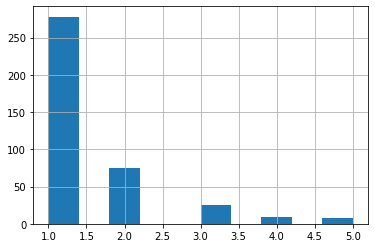

In [46]:
df_tmp['Dalc'].hist()

# KNN을 이용한 대치
- 최근접 이웃 알고리즘을 통해, 수치형 데이터에 한해 결측치가 있는 변수를 대체 할 수 있다.

In [53]:
from sklearn.impute import KNNImputer

# 최빈값으로 Imputer 선언
imputer_mode = KNNImputer()
imputer_mid.fit(df)

# 데이터 변환 (array로 반환하기 때문에 필요에 맞는 형태로 변환 후 사용)
df_tmp = imputer_mid.transform(df)
df_tmp = pd.DataFrame(df_tmp, index = df.index, columns = df.columns)

In [54]:
df_tmp.isna().sum()

famrel      0
freetime    0
goout       0
Dalc        0
Walc        0
health      0
absences    0
dtype: int64

In [55]:
df_tmp.describe()

,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,3.944304,3.237975,3.113924,1.465823,2.283544,3.567089,5.663291
std,0.896659,0.991884,1.108199,0.870102,1.284665,1.380587,7.984156
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


<AxesSubplot:>

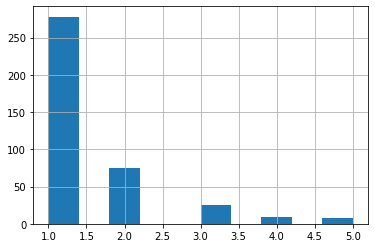

In [56]:
df_tmp['Dalc'].hist()